In [827]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The set also contains customer demographics(age,gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. Now they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Importing the dataset

In [828]:
df = pd.read_csv('/Users/evertondennis/Desktop/train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [829]:
import pandas as pd
data = pd.read_csv('/Users/evertondennis/Desktop/test.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [830]:
# Merge the two datasets (train and test)
df = pd.concat([df, data], axis=0)
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [831]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [832]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [833]:
df.drop(['User_ID'], axis=1, inplace=True)

In [834]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [835]:

pd.get_dummies(df['Gender'])

,F,M
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
233594,True,False
233595,True,False
233596,True,False
233597,True,False


In [836]:
# Sorting Categorical feature  Gender
df['Gender']=df['Gender'].map({'F':0, 'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [837]:
# Handling categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [838]:
df['Age']=df['Age'].map({'0-17':0, '55+':6, '26-35':2, '46-50':4, '51-55':5, '36-45':3, '18-25':1})
df.head()



,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [839]:
df_city=pd.get_dummies(df['City_Category'], drop_first=True)
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [840]:
df=pd.concat([df, df_city], axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [841]:
#Missing Values
df.isnull().sum()


Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [842]:
# Filling missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [843]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [844]:
# Replace missing values with the mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_2'].isnull().sum()



0

In [845]:
# Product Category 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [846]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [847]:
# Replace missing values with the mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df.head()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,6,16,C,4+,0,8,8.0,16.0,7969.0,False,True


In [848]:
df.shape

(783667, 13)

In [849]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  bool   
 12  C                           783667 non-null  bool   
dtypes: bool(2), float64

In [850]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [851]:
df['Stay_In_Current_City_Years'].str.replace('+', '')



0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [852]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,6,16,C,4+,0,8,8.0,16.0,7969.0,False,True


In [853]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  bool   
 12  C                           783667 non-null  bool   
dtypes: bool(2), float64

In [854]:
# Convert object to integer
import re

# Convert the column to string if it's not already
if df['Stay_In_Current_City_Years'].dtype != 'object':
    df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(str)

# Use regular expression to keep only the first digit in the strings
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(lambda x: re.findall('\d', x)[0] if re.findall('\d', x) else '0')

# Convert the column back to integer
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  bool   
 12  C                           783667 non-null  bool   
dtypes: bool(2), float64

In [855]:
df['B']=df['B'].astype(int)

In [856]:
df['C']=df['B'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  int64  
 12  C                           783667 non-null  int64  
dtypes: float64(3), int6

<Axes: xlabel='Age', ylabel='Purchase'>

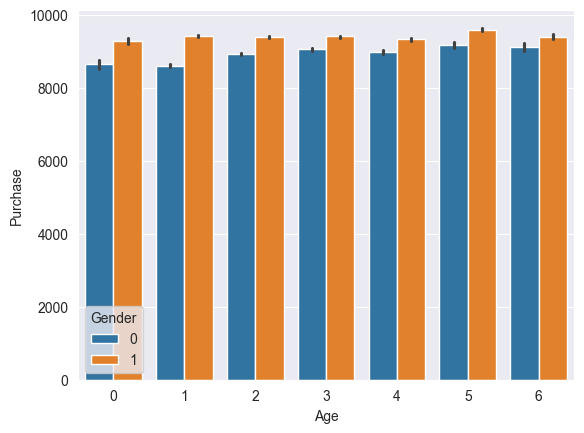

In [857]:
# Visualizing the data
sns.barplot(x='Age', y='Purchase', hue='Gender' , data=df)

In [858]:
# The  purchase of men is higher than women

<Axes: xlabel='Occupation', ylabel='Purchase'>

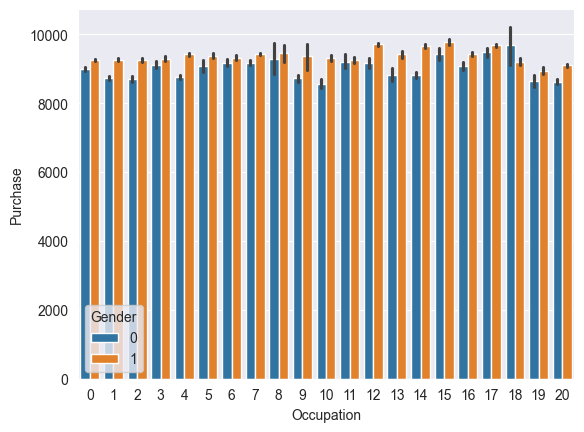

In [859]:
# Visualizing of purchase eith occupation
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

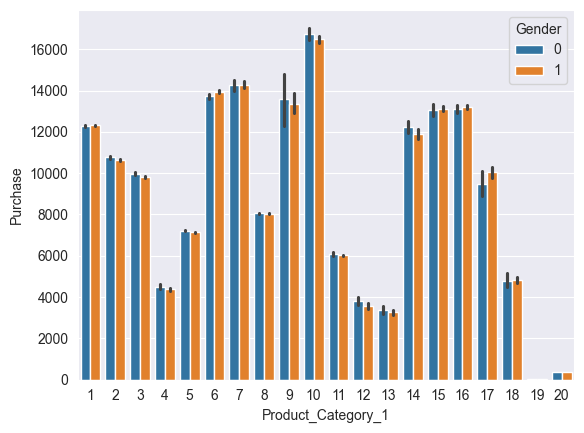

In [860]:
# The purchase
sns.barplot(x='Product_Category_1', y='Purchase' ,hue='Gender', data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

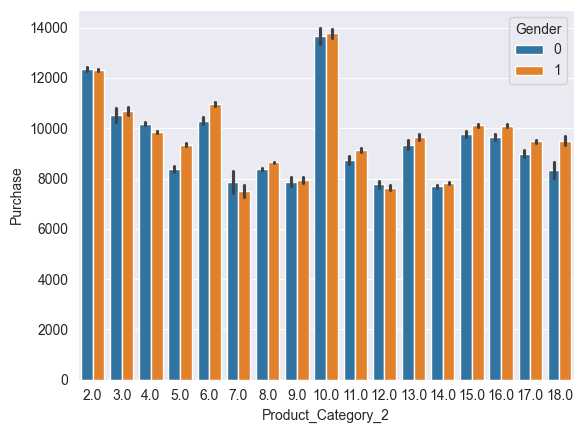

In [861]:
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

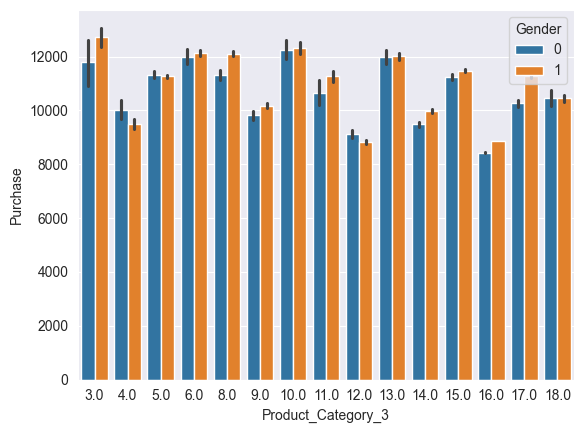

In [862]:
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df)

In [863]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,C,4,0,8,8.0,16.0,7969.0,0,0


In [864]:
# Feature scaling
df_test = df[df['Purchase'].isnull()]
df_train = df[~df['Purchase'].isnull()]


In [865]:
X.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,0,10,A,2,0,3,8.0,16.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,0,0
2,P00087842,0,0,10,A,2,0,12,8.0,16.0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,16.0,0,0
4,P00285442,1,6,16,C,4,0,8,8.0,16.0,0,0


In [866]:
## Feature Scaling
df_test=[df['Purchase'].isnull()]
df_train=[~df['Purchase'].isnull()]


In [868]:
X.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,0,10,A,2,0,3,8.0,16.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,0,0
2,P00087842,0,0,10,A,2,0,12,8.0,16.0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,16.0,0,0
4,P00285442,1,6,16,C,4,0,8,8.0,16.0,0,0


In [870]:
X.shape

(550068, 12)